### Puxar base de dados

In [69]:
import pandas as pd

exportacao_franca_df = pd.read_csv(r'exportacoes_franca.csv')
display(exportacao_franca_df)

,Year,Month,Country,City,SH4 Code,SH4 Description,SH2 Code,SH2 Description,Economic Block,US$ FOB,Net Weight
0,2016,1,France,Águas Mornas - SC,303,"Fish, frozen, excluding fish fillets and other...",3,"Fish and crustaceans, molluscs and other aquat...",Europe,79360,14150
1,2016,1,France,Águas Mornas - SC,303,"Fish, frozen, excluding fish fillets and other...",3,"Fish and crustaceans, molluscs and other aquat...",European Union (EU),79360,14150
2,2016,1,France,Águas Mornas - SC,304,Fish fillets and other fish meat (whether or n...,3,"Fish and crustaceans, molluscs and other aquat...",Europe,69412,9385
3,2016,1,France,Águas Mornas - SC,304,Fish fillets and other fish meat (whether or n...,3,"Fish and crustaceans, molluscs and other aquat...",European Union (EU),69412,9385
4,2016,1,France,Alfenas - MG,901,"Coffee, whether or not roasted or decaffeinate...",9,"Coffee, tea, maté and spices",Europe,180914,57600
...,...,...,...,...,...,...,...,...,...,...,...
142355,2020,12,France,Vinhedo - SP,8424,Mechanical appliances (whether or not hand-ope...,84,"Nuclear reactors, boilers, machinery and mecha...",European Union (EU),2316,4
142356,2020,12,France,Vitória de Santo Antão - PE,714,"Manioc, arrowroot, salep, Jerusalem artichokes...",7,Edible vegetables and certain roots and tubers,Europe,27060,26400
142357,2020,12,France,Vitória de Santo Antão - PE,714,"Manioc, arrowroot, salep, Jerusalem artichokes...",7,Edible vegetables and certain roots and tubers,European Union (EU),27060,26400
142358,2020,12,France,Xapuri - AC,4409,Wood (including strips and friezes for parquet...,44,Wood and articles of wood; wood charcoal,Europe,31111,23045


### Informações Gerais

Quantas linhas têm a tabela? Existe algum valor vazio que deveria ser tratado?

In [70]:
exportacao_franca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142360 entries, 0 to 142359
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Year             142360 non-null  int64 
 1   Month            142360 non-null  int64 
 2   Country          142360 non-null  object
 3   City             142360 non-null  object
 4   SH4 Code         142360 non-null  int64 
 5   SH4 Description  142360 non-null  object
 6   SH2 Code         142360 non-null  int64 
 7   SH2 Description  142360 non-null  object
 8   Economic Block   142360 non-null  object
 9   US$ FOB          142360 non-null  int64 
 10  Net Weight       142360 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 11.9+ MB


### Como foi a evolução das exportações para a frança ao longo dos anos?

Crie uma tabela com os anos de 2016, 2017, 2018, 2019 e 2020 e o valor US$ de exportações

In [71]:
evolucao_exp_fr = exportacao_franca_df[['Year', 'US$ FOB']]
evolucao_exp_fr = evolucao_exp_fr.groupby('Year').sum()
display(evolucao_exp_fr)

,US$ FOB
Year,
2016,4615500082
2017,4448705456
2018,5239424416
2019,5218723612
2020,3967594810


### Quais os produtos mais exportados ao longo de todo o período?

Queremos saber os produtos com maior valor US$ de exportação

,,US$ FOB
SH2 Code,SH2 Description,
23,Residues and waste from the food industries; others,5641498484
26,"Ores, slag and ash",3404353274
84,"Nuclear reactors, boilers, machinery and mechanical appliances; others",1889781694
47,"Pulp of wood or of other fibrous cellulosic material, others,",1855424642
88,"Aircraft, spacecraft, and parts thereof",1253007710
9,"Coffee, tea, maté and spices",1200127040
27,"Mineral fuels, mineral oils, bituminous substances; mineral waxes",984374882
44,Wood and articles of wood; wood charcoal,833385980
12,"Oil seeds and oleaginous fruits; Grains, Seeds, others",664218888


<Axes: xlabel='SH2 Code,SH2 Description'>

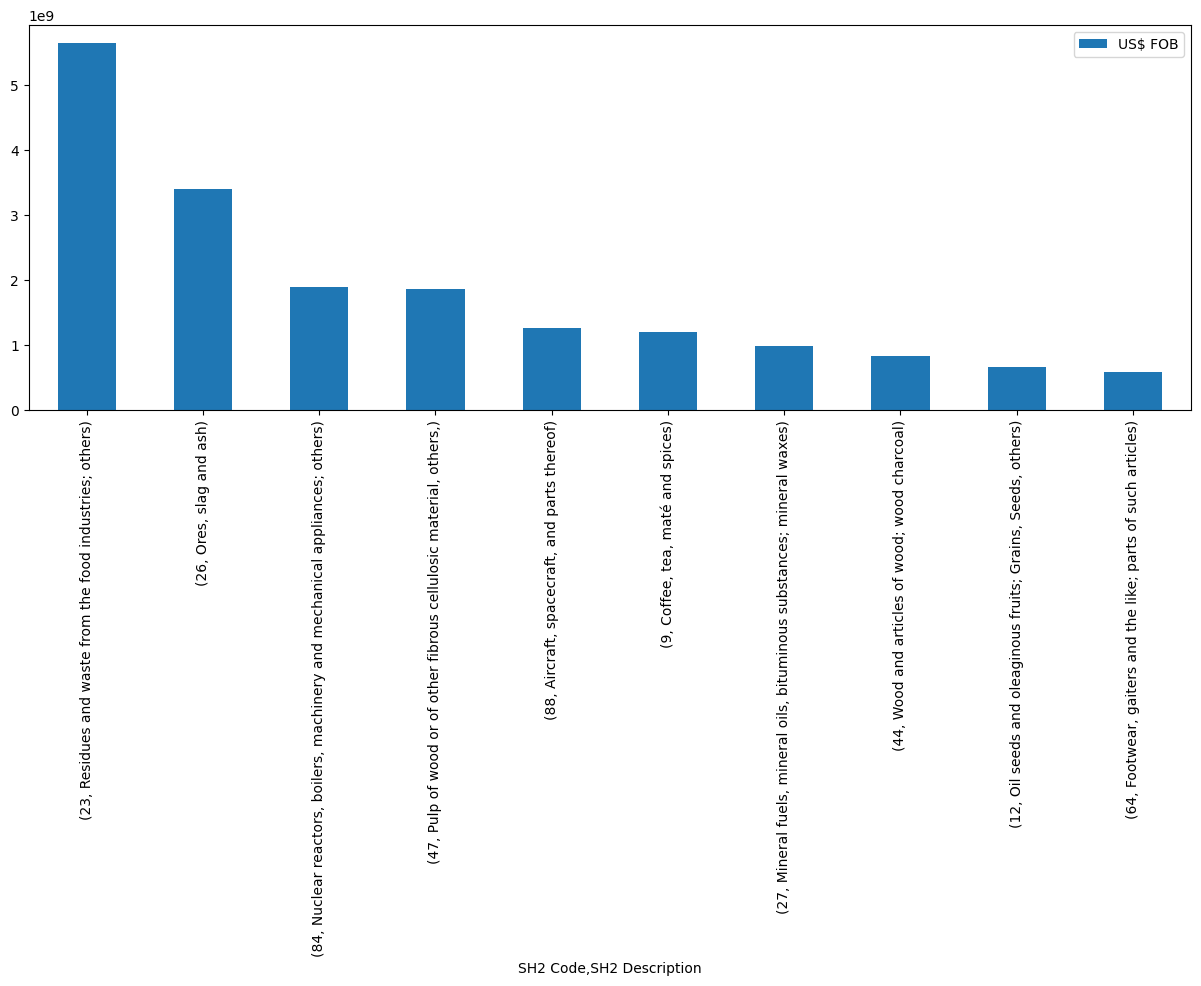

In [72]:
produtos_mais_exportados = exportacao_franca_df[['SH2 Code', 'SH2 Description', 'US$ FOB']]
produtos_mais_exportados = produtos_mais_exportados.groupby(['SH2 Code', 'SH2 Description']).sum()
produtos_mais_exportados = produtos_mais_exportados.sort_values(by='US$ FOB', ascending=False)
display(produtos_mais_exportados[:10])
produtos_mais_exportados[:10].plot(figsize=(15, 5), kind='bar')

### Em 2020 qual cidade mais exportou para a França?
Em valores US$

In [81]:
exportacao_2020_city = exportacao_franca_df[['Year','City', 'US$ FOB']].where(exportacao_franca_df['Year']==2020).groupby('City')
exportacao_2020_city = exportacao_2020_city['US$ FOB'].sum()
exportacao_2020_city = exportacao_2020_city.sort_values(ascending=False)
maior_faturamento = exportacao_2020_city.max()
city_maior_faturamento = exportacao_2020_city.idxmax()
print(f'A cidade {city_maior_faturamento} foi a que mais exportou para França em 2020. Com um faturamento de R$ {maior_faturamento:,.2f}')


A cidade Duque de Caxias - RJ foi a que mais exportou para França em 2020. Com um faturamento de R$ 279,405,596.00


### Quais os produtos mais exportados (em US$) que as 2 maiores cidades (em exportação em 2020) exportaram?

In [ ]:

cidade1 = exportacao_2020_city.index[0]
prod_exp_city = exportacao_franca_df.loc[exportacao_franca_df['Year']==2020, :]
prod_exp_city = prod_exp_city.loc[prod_exp_city['City']==cidade1, :]
prod_exp_city = prod_exp_city[['SH2 Code', 'SH2 Description', 'US$ FOB']].groupby('SH2 Code').sum()
prod_exp_city = prod_exp_city.sort_values(by='US$ FOB', ascending=False)
print(f"Produtos mais exportados da cidade: {cidade1}")
display(prod_exp_city.head(10))

Produtos mais exportados da cidade: Duque de Caxias - RJ


,SH2 Description,US$ FOB
SH2 Code,,
84,"Nuclear reactors, boilers, machinery and mecha...",185816982
27,"Mineral fuels, mineral oils, bituminous substa...",67355688
73,Articles of iron or steelArticles of iron or s...,9118714
23,Residues and waste from the food industries; o...,4014274
90,"Optical, photographic, cinematographic instrum...",3013092
75,Nickel and articles thereofNickel and articles...,2951286
85,Electrical machinery and equipment and parts t...,2595048
78,Lead and articles thereofLead and articles the...,1660180
40,Rubber and articles thereofRubber and articles...,1379296


In [83]:
cidade2 = exportacao_2020_city.index[1]
prod_exp_city = exportacao_franca_df.loc[exportacao_franca_df['Year']==2020, :]
prod_exp_city = prod_exp_city.loc[prod_exp_city['City']==cidade2, :]
prod_exp_city = prod_exp_city[['SH2 Code', 'SH2 Description', 'US$ FOB']].groupby('SH2 Code').sum()
prod_exp_city = prod_exp_city.sort_values(by='US$ FOB', ascending=False)
print(f"Produtos mais exportados da cidade: {cidade2}")
display(prod_exp_city.head(10))

Produtos mais exportados da cidade: Luís Eduardo Magalhães - BA


,SH2 Description,US$ FOB
SH2 Code,,
23,Residues and waste from the food industries; o...,265299808
8,Edible fruit and nuts; peel of citrus fruits o...,28324
